In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

NameError: name 'online_shoppers_intention' is not defined

In [ ]:
from google.colab import files

# Upload the dataset file
uploaded = files.upload()

# Identify the uploaded file name
file_name = next(iter(uploaded))

# Load the dataset into a Pandas DataFrame
data = pd.read_csv(file_name)

# Display basic information about the dataset
print("Dataset Shape:", data.shape)
print("\nColumn Names:", data.columns)
print("\nFirst 5 Rows of the Dataset:")
print(data.head())


Saving online_shoppers_intention.csv to online_shoppers_intention.csv
Dataset Shape: (12330, 18)

Column Names: Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

First 5 Rows of the Dataset:
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1 

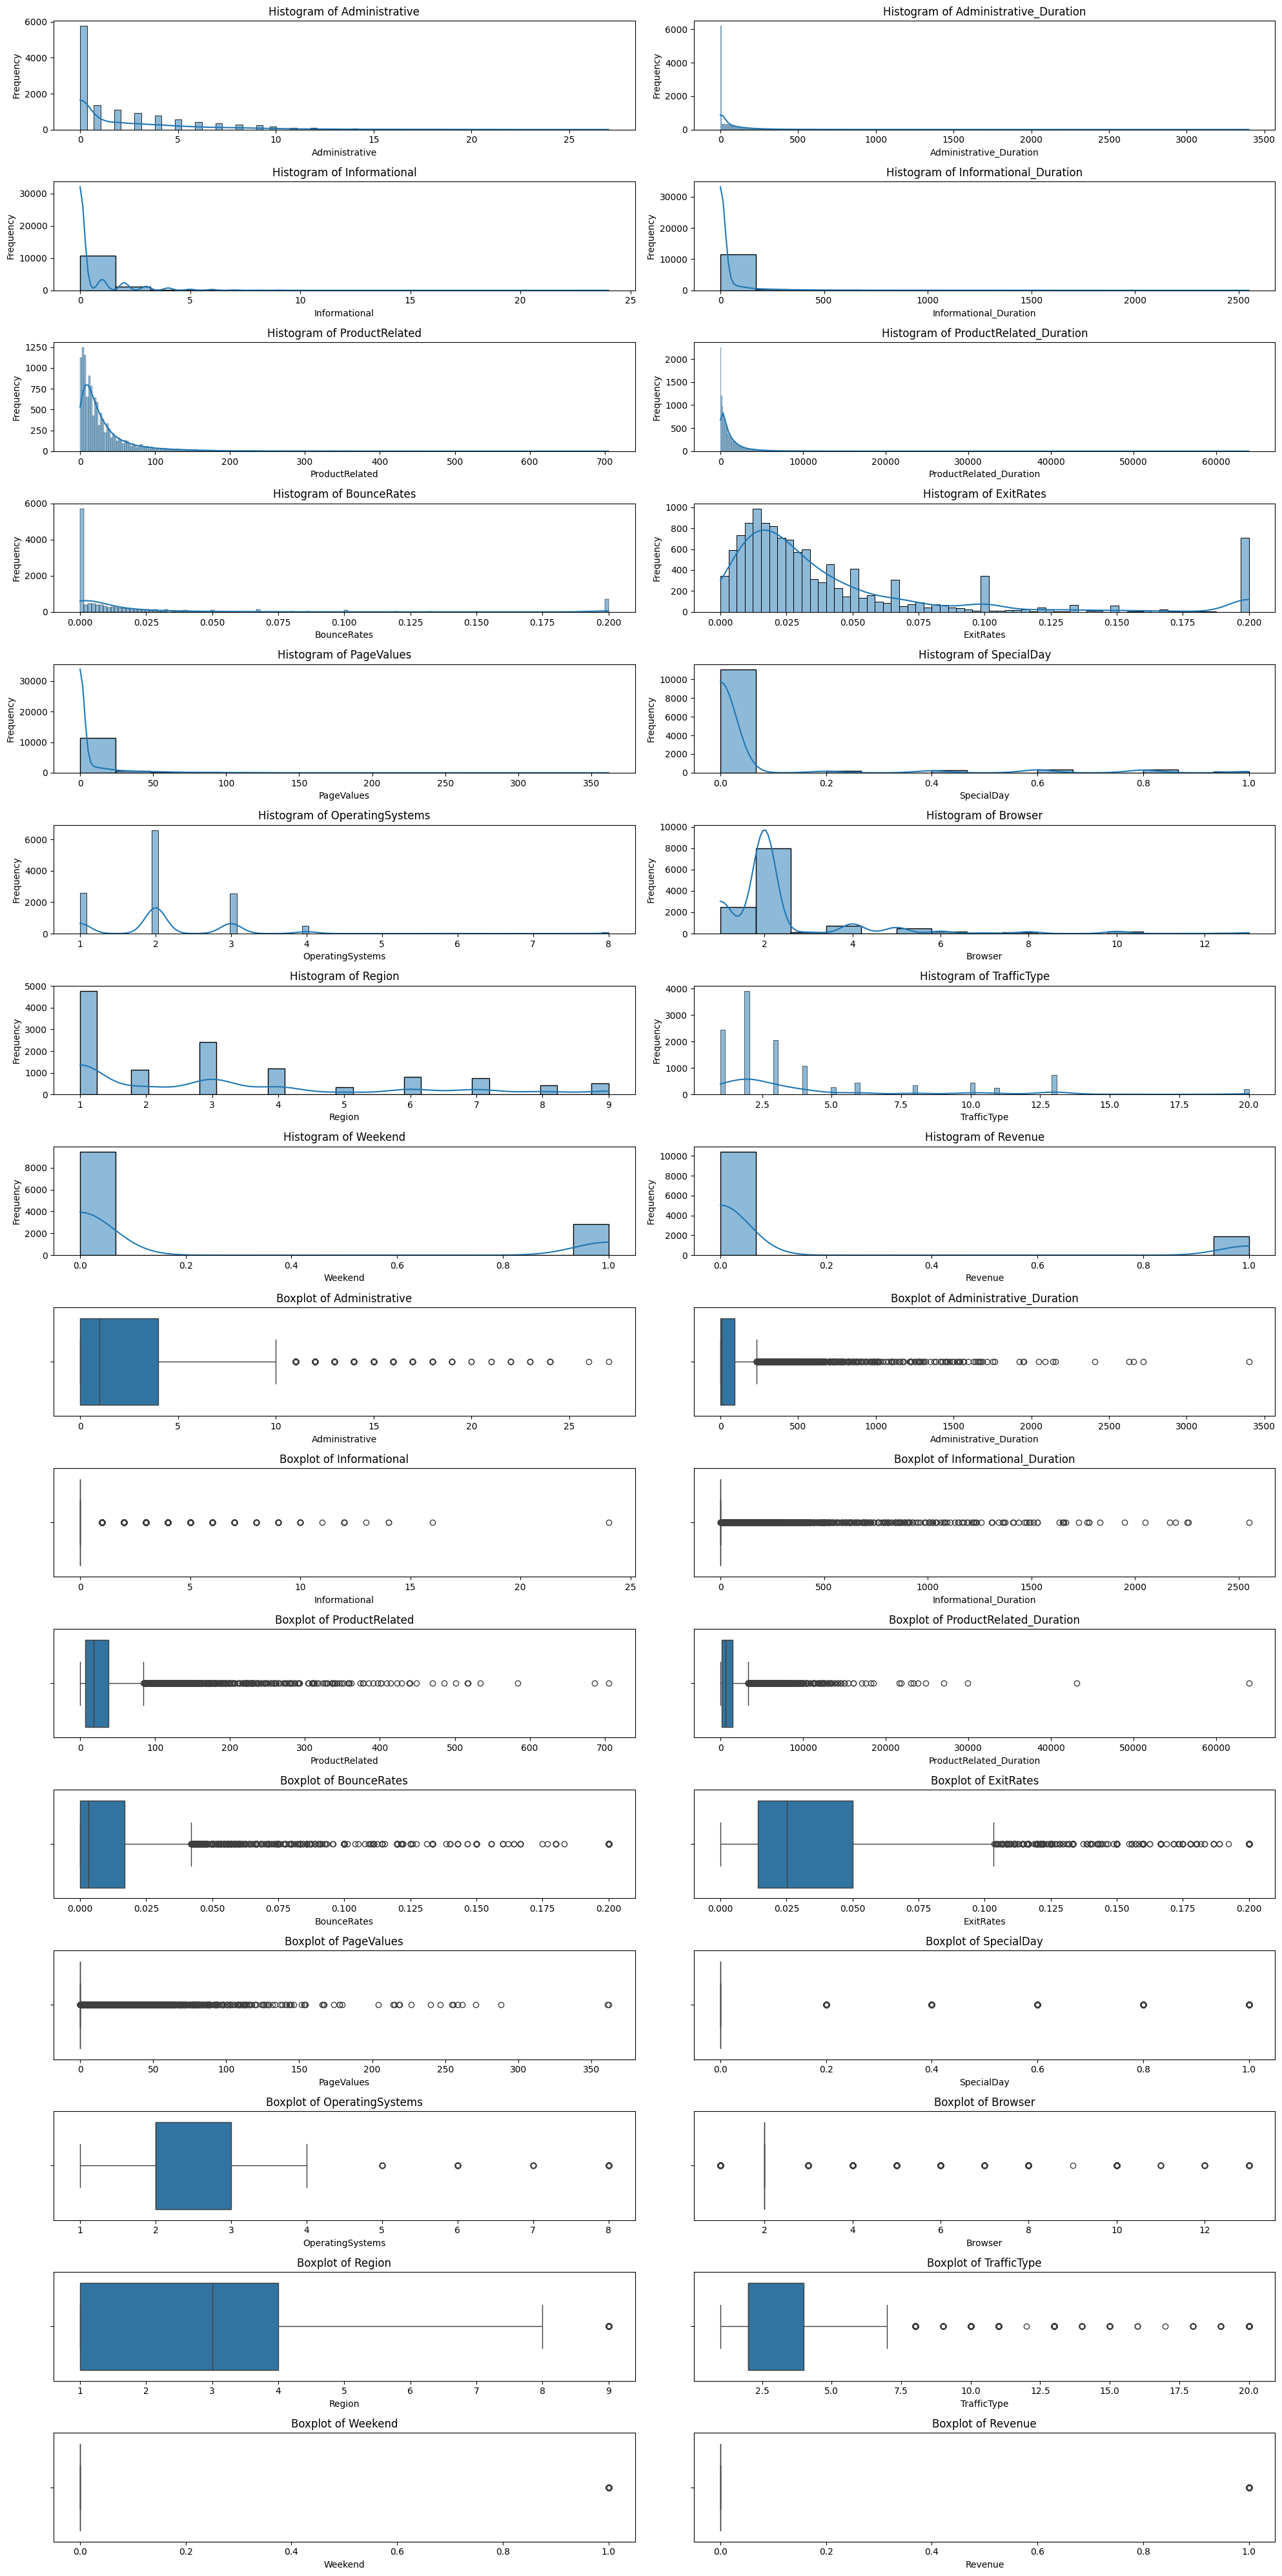

In [ ]:
# Define the list of variables for analysis (update as needed)
variables_of_interest = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates',
    'PageValues', 'SpecialDay',
    'OperatingSystems', 'Browser', 'Region', 'TrafficType',
    'Weekend', 'Revenue'
]

# Univariate Analysis: Histograms and Boxplots for selected variables
plt.figure(figsize=(20, 40))
for i, variable in enumerate(variables_of_interest, 1):
    plt.subplot(len(variables_of_interest), 2, i)
    sns.histplot(data[variable], kde=True)
    plt.title(f'Histogram of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')

    plt.subplot(len(variables_of_interest), 2, i + len(variables_of_interest))
    sns.boxplot(x=data[variable])
    plt.title(f'Boxplot of {variable}')
    plt.xlabel(variable)

plt.tight_layout()
plt.show()

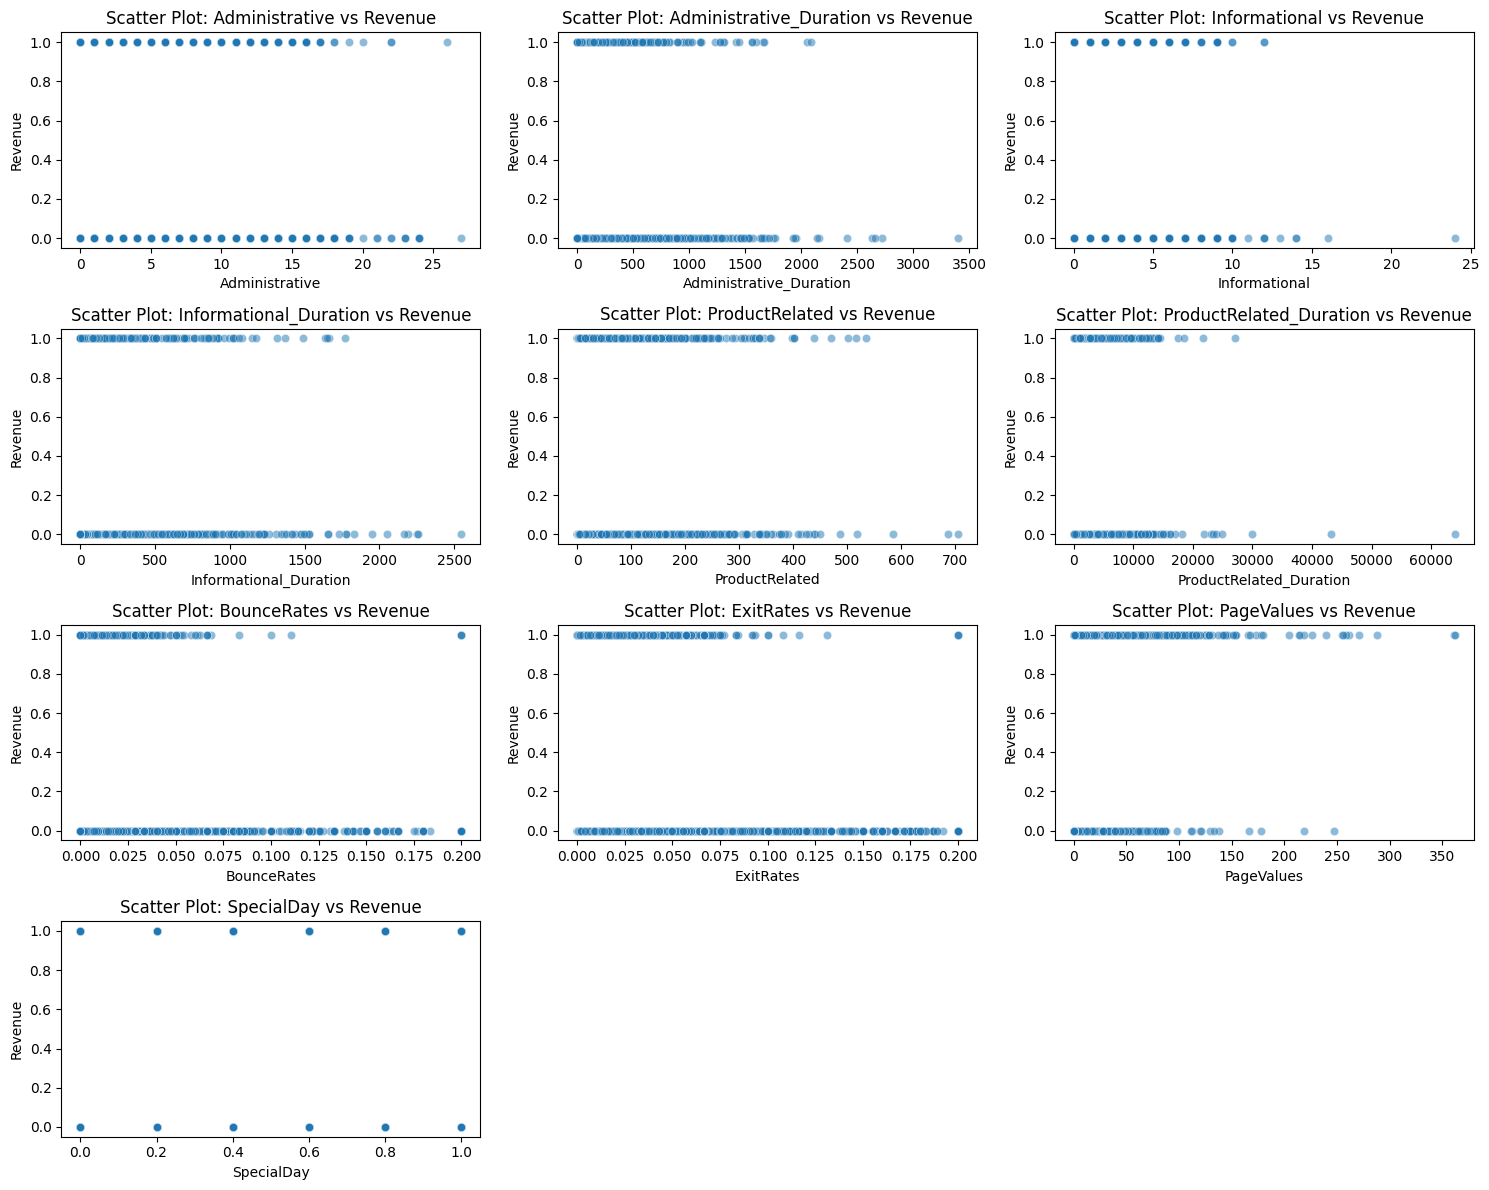

In [ ]:
# Select predictor variables and define the target variable (Revenue)
predictor_vars = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates',
    'PageValues', 'SpecialDay'
]
target_var = 'Revenue'

# Create scatter plots for each predictor variable vs. Revenue
plt.figure(figsize=(15, 12))
for i, var in enumerate(predictor_vars, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(x=data[var], y=data[target_var], alpha=0.5)
    plt.title(f'Scatter Plot: {var} vs Revenue')
    plt.xlabel(var)
    plt.ylabel('Revenue')

plt.tight_layout()
plt.show()

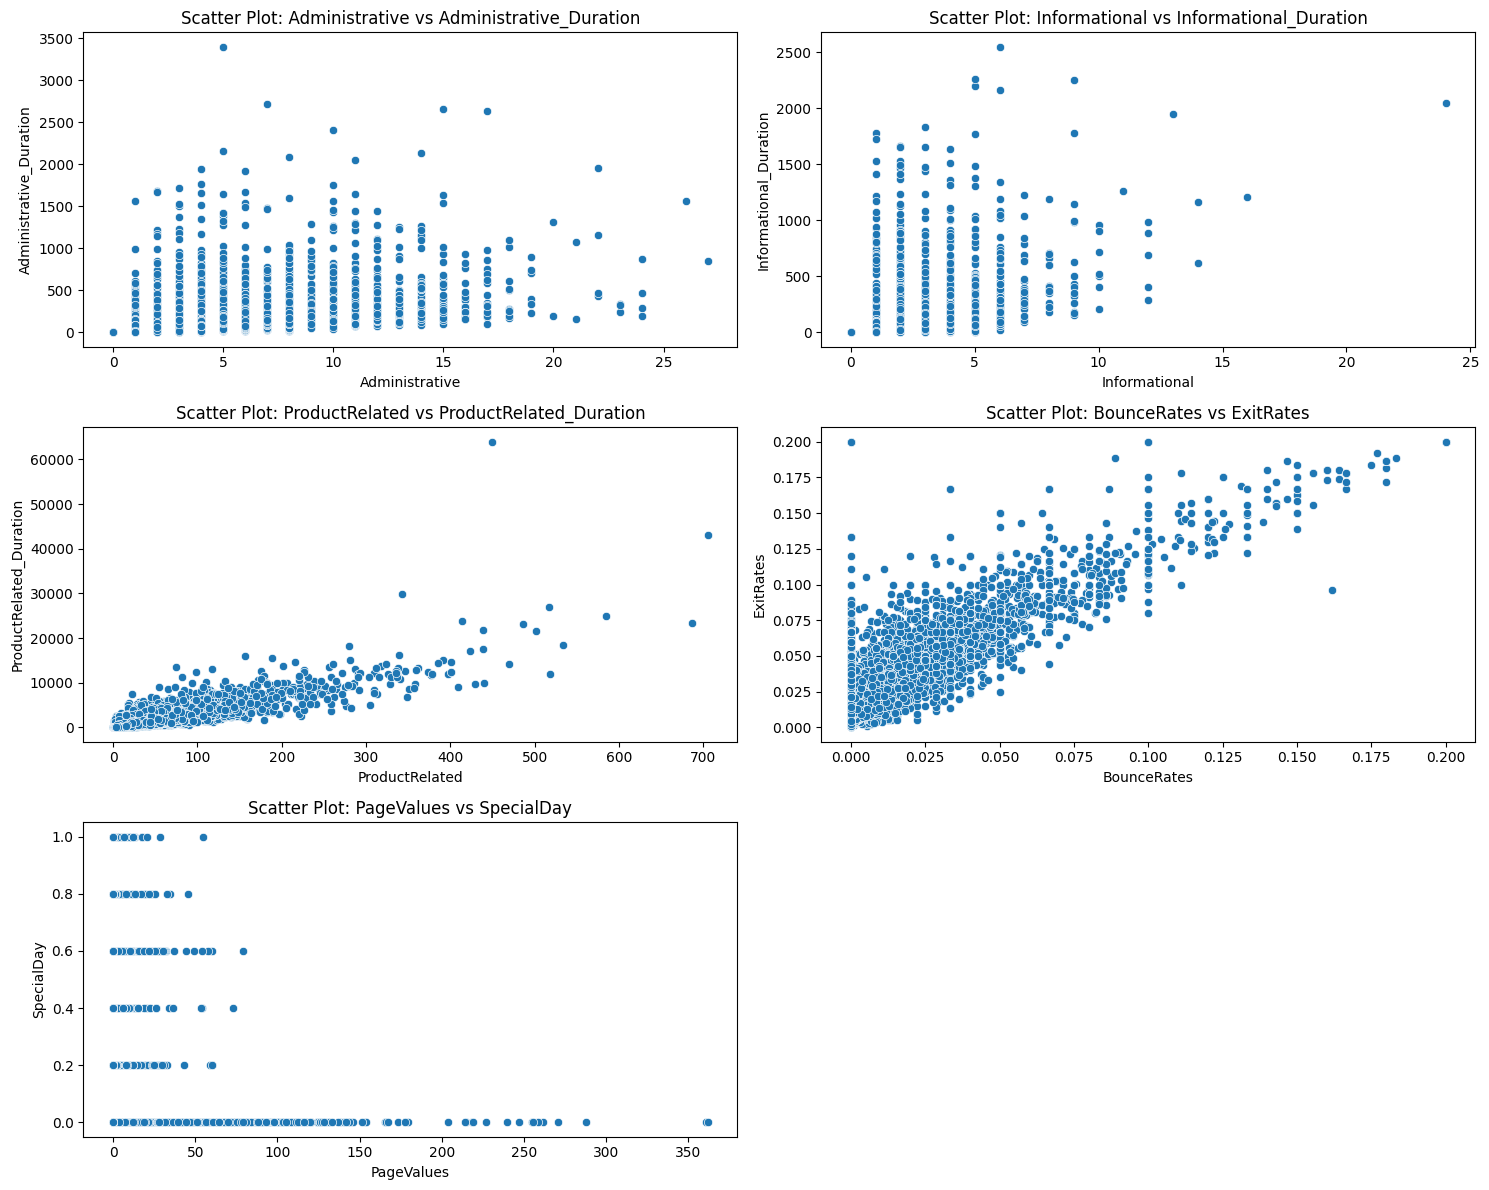

In [ ]:
# Select pairs of variables for bivariate analysis (update as needed)
variable_pairs = [
    ('Administrative', 'Administrative_Duration'),
    ('Informational', 'Informational_Duration'),
    ('ProductRelated', 'ProductRelated_Duration'),
    ('BounceRates', 'ExitRates'),
    ('PageValues', 'SpecialDay')
]

# Create scatter plots for each selected pair of variables
plt.figure(figsize=(15, 12))
for i, (var1, var2) in enumerate(variable_pairs, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=data[var1], y=data[var2])
    plt.title(f'Scatter Plot: {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)

plt.tight_layout()
plt.show()

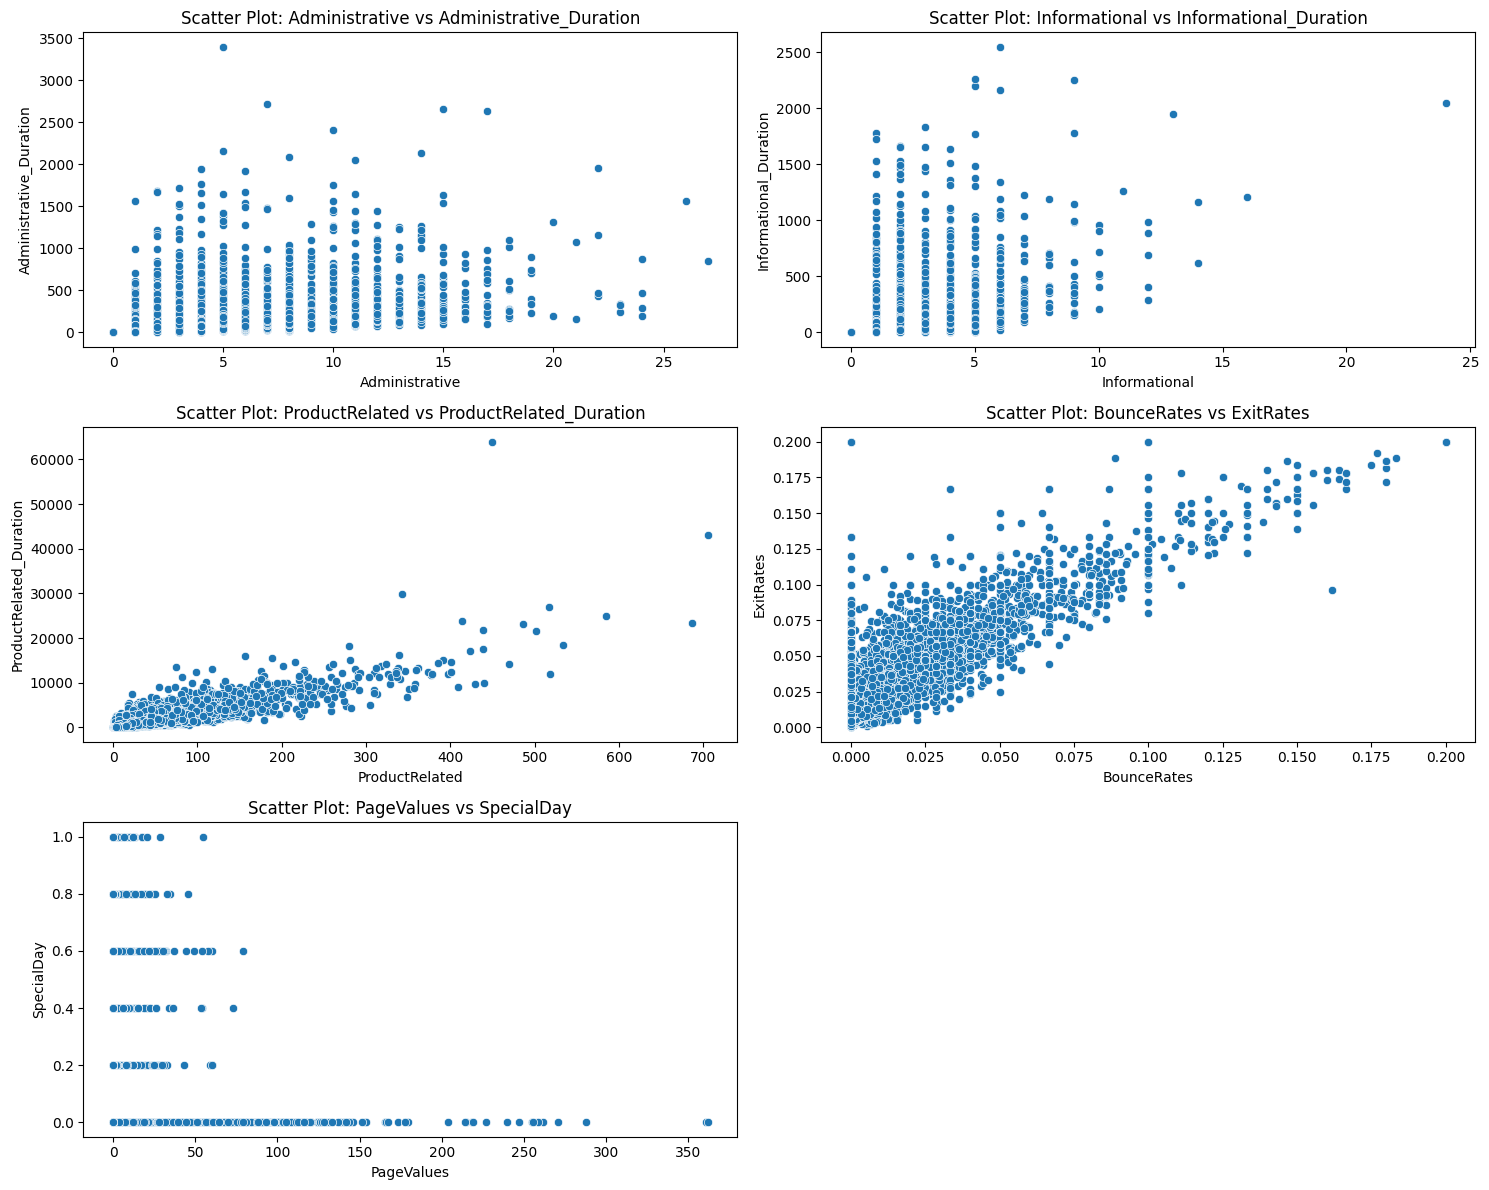

In [ ]:
# Define pairs of variables for bivariate analysis
variable_pairs = [
    ('Administrative', 'Administrative_Duration'),
    ('Informational', 'Informational_Duration'),
    ('ProductRelated', 'ProductRelated_Duration'),
    ('BounceRates', 'ExitRates'),
    ('PageValues', 'SpecialDay')
]

# Create scatter plots for each selected pair of variables
plt.figure(figsize=(15, 12))
for i, (var1, var2) in enumerate(variable_pairs, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=data[var1], y=data[var2])
    plt.title(f'Scatter Plot: {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)

plt.tight_layout()
plt.show()

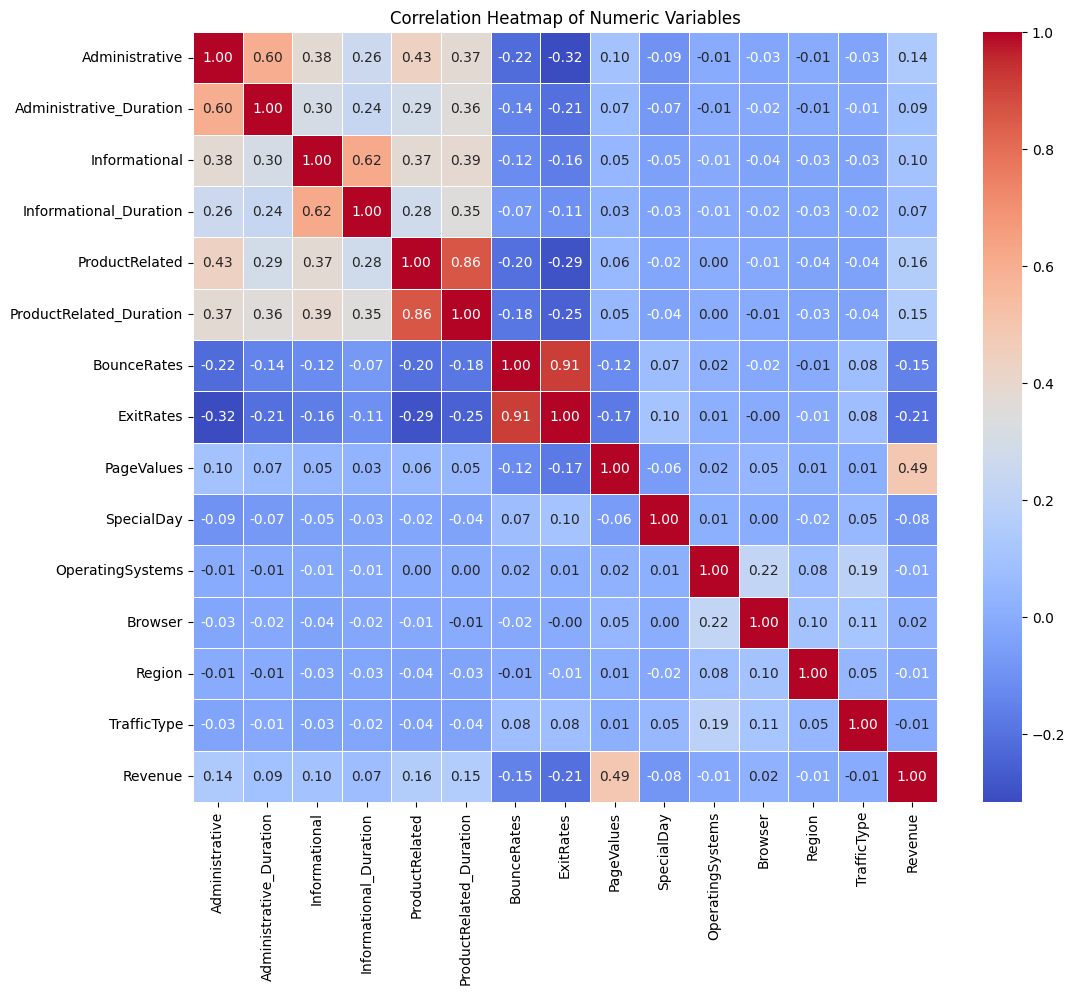

In [ ]:
# Exclude non-numeric columns (e.g., 'Month', 'VisitorType', 'Weekend') before computing correlations
numeric_data = data.drop(['Month', 'VisitorType', 'Weekend'], axis=1)

# Compute the correlation matrix for numeric data
correlation_matrix = numeric_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

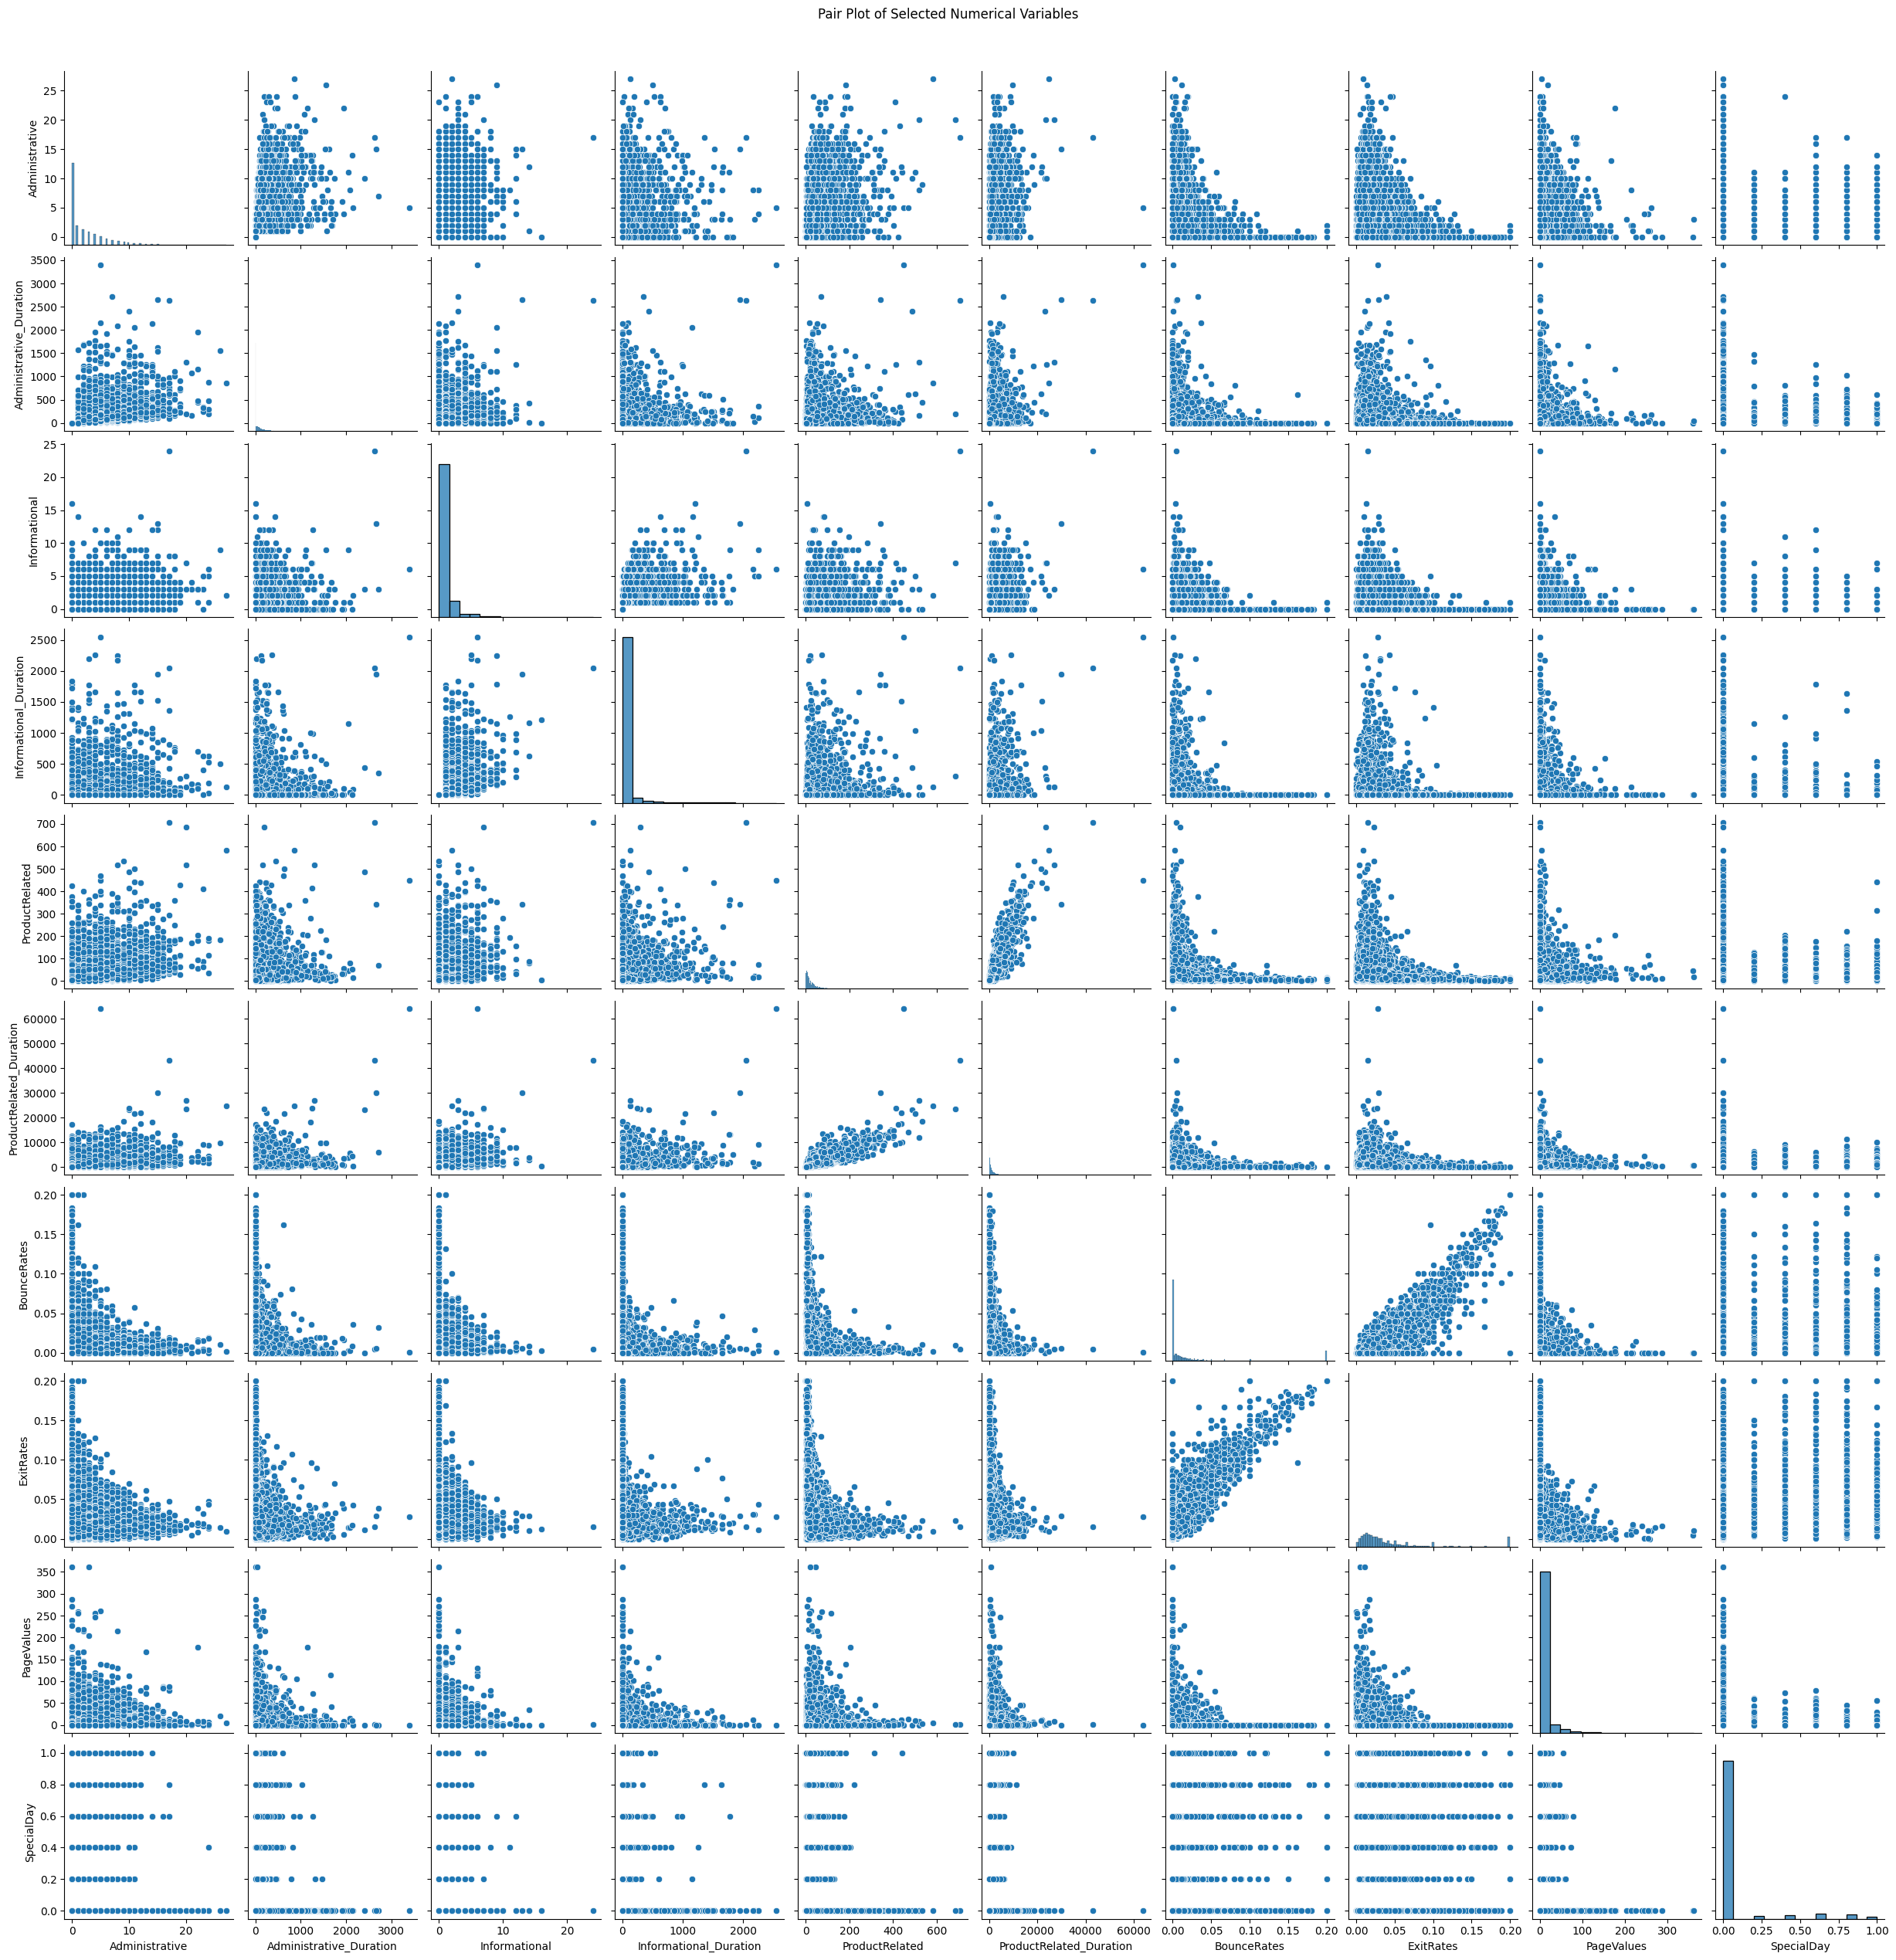

In [ ]:
# Select numerical variables for pair plots (update as needed)
numerical_vars = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates',
    'PageValues', 'SpecialDay'
]

# Create pair plot
sns.pairplot(data[numerical_vars])
plt.suptitle('Pair Plot of Selected Numerical Variables', y=1.02)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [ ]:
# Encode categorical variables using LabelEncoder or OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Encode 'Month' column
month_encoder = LabelEncoder()
data['Month'] = month_encoder.fit_transform(data['Month'])

# Encode 'VisitorType' column
visitor_encoder = LabelEncoder()
data['VisitorType'] = visitor_encoder.fit_transform(data['VisitorType'])

# No need to encode 'Weekend' column as it is already binary (0 or 1)
from sklearn.model_selection import train_test_split

# Select features (X) and target variable (y)
X = data.drop('Revenue', axis=1)
y = data['Revenue']

# Split the data into training (75%) and testing (25%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Plot ROC curve
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Display evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Positive Predictive Value): {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")


Confusion Matrix:
 [[2523   71]
 [ 327  162]]
Accuracy: 0.8709
Precision (Positive Predictive Value): 0.6953
Recall (Sensitivity): 0.3313
Specificity: 0.9726
AUC-ROC: 0.8197


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc

# Load the dataset
data = pd.read_csv('online_shoppers_intention.csv')

# Preprocessing: Encode categorical variables
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Month'] = encoder.fit_transform(data['Month'])
data['VisitorType'] = encoder.fit_transform(data['VisitorType'])

# Select features (X) and target variable (y)
X = data.drop('Revenue', axis=1)
y = data['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model with increased max_iter
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Plot ROC curve
y_probs = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Display evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Positive Predictive Value): {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")


Confusion Matrix:
 [[2533   61]
 [ 323  166]]
Accuracy: 0.8754
Precision (Positive Predictive Value): 0.7313
Recall (Sensitivity): 0.3395
Specificity: 0.9765
AUC-ROC: 0.8798


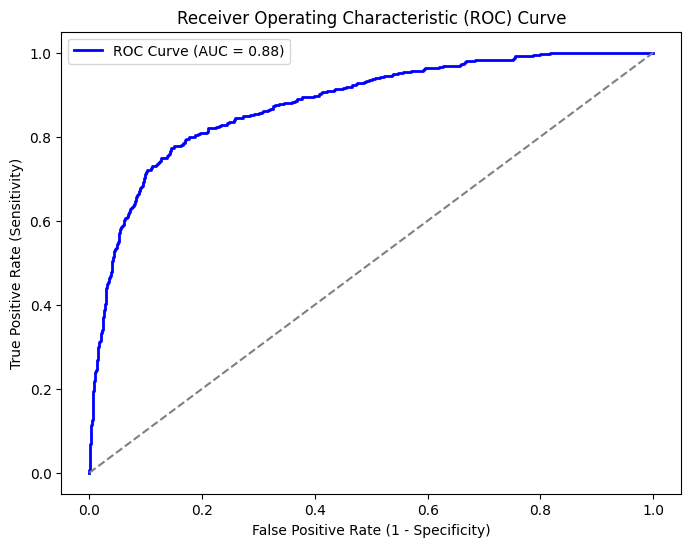

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for positive class (class 1)
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line representing random guess
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# Encode categorical variables
encoder = LabelEncoder()
data['Month'] = encoder.fit_transform(data['Month'])
data['VisitorType'] = encoder.fit_transform(data['VisitorType'])

# Select features (X) and target variable (y)
X = data.drop('Revenue', axis=1)
y = data['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the input features (optional for decision trees, but can be beneficial for consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Confusion Matrix:
 [[2364  230]
 [ 224  265]]
Accuracy: 0.8527
Precision (Positive Predictive Value): 0.5354
Recall (Sensitivity): 0.5419
Specificity: 0.9113
AUC-ROC: 0.7266


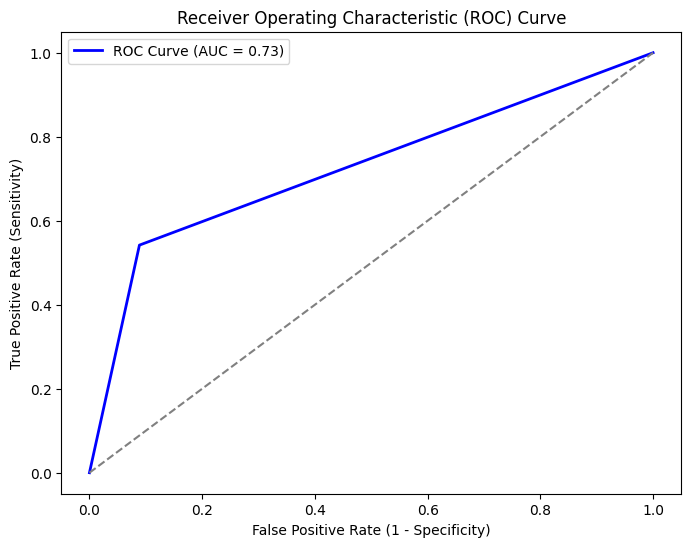

In [ ]:
# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Calculate specificity
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Calculate ROC curve and AUC
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Display evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Positive Predictive Value): {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [ ]:
# Scale the input features (optional for Random Forest, but can be beneficial for consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Confusion Matrix:
 [[2491  103]
 [ 213  276]]
Accuracy: 0.8975
Precision (Positive Predictive Value): 0.7282
Recall (Sensitivity): 0.5644
Specificity: 0.9603
AUC-ROC: 0.9275


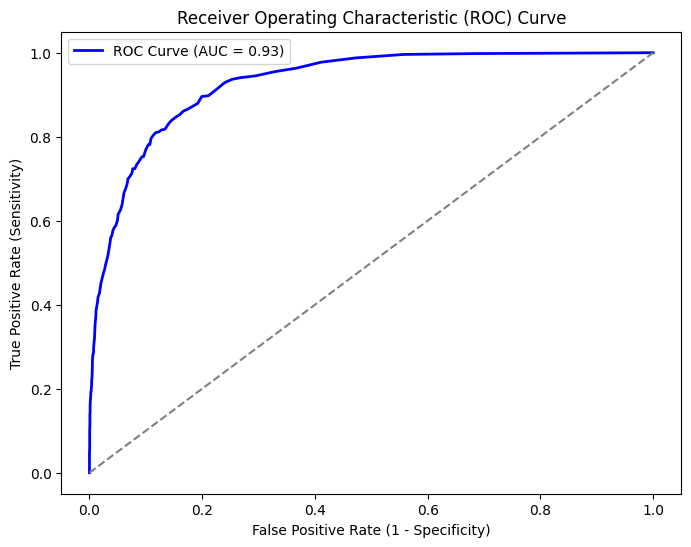

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Calculate specificity
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Calculate ROC curve and AUC
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Display evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Positive Predictive Value): {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Confusion Matrix:
 [[2481  113]
 [ 207  282]]
Accuracy: 0.8962
Precision (Positive Predictive Value): 0.7139
Recall (Sensitivity): 0.5767
Specificity: 0.9564
AUC-ROC: 0.9296


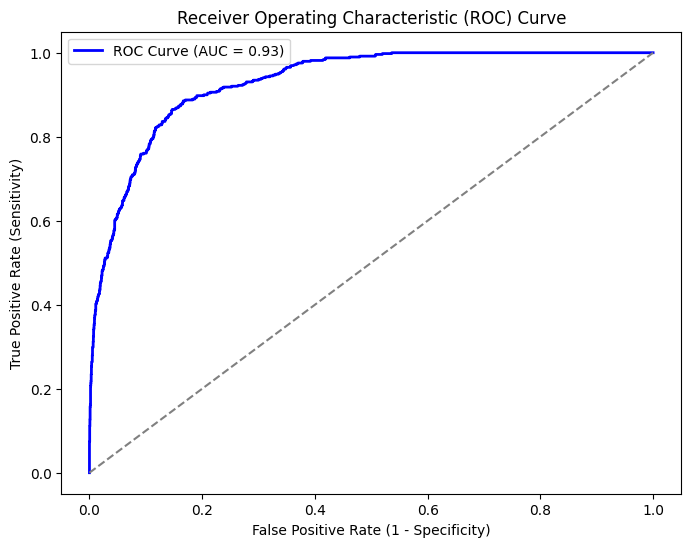

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Initialize and train the GBM model
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Calculate specificity
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Calculate ROC curve and AUC
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Display evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Positive Predictive Value): {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Confusion Matrix:
 [[2510   84]
 [ 309  180]]
Accuracy: 0.8725
Precision (Positive Predictive Value): 0.6818
Recall (Sensitivity): 0.3681
Specificity: 0.9676
AUC-ROC: 0.7904


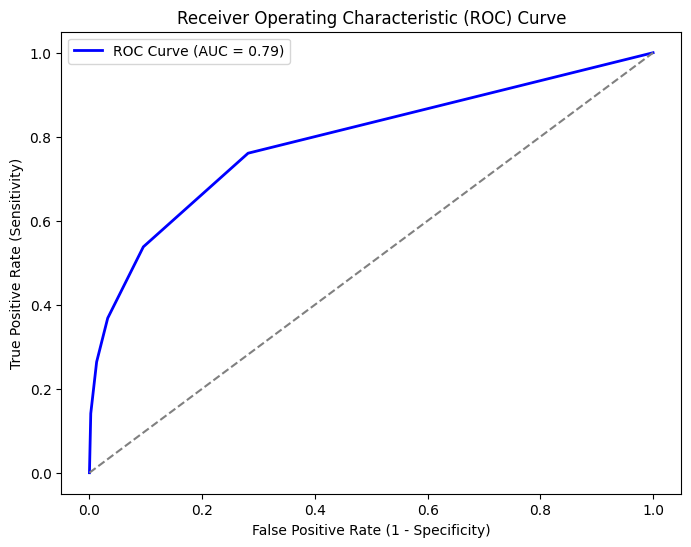

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize and train the kNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Calculate specificity
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Calculate ROC curve and AUC
y_probs = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Display evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Positive Predictive Value): {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Confusion Matrix:
 [[2516   78]
 [ 275  214]]
Accuracy: 0.8855
Precision (Positive Predictive Value): 0.7329
Recall (Sensitivity): 0.4376
Specificity: 0.9699
AUC-ROC: 0.8472


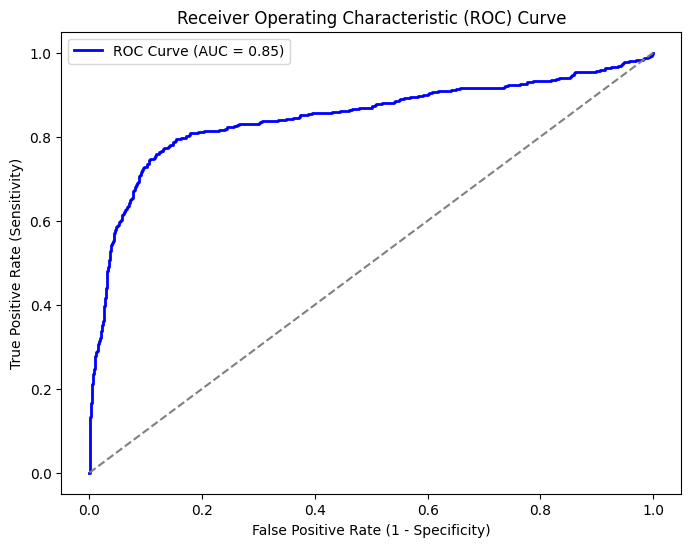

In [ ]:
from sklearn.svm import SVC
# Initialize and train the SVM model
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Calculate specificity
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Calculate ROC curve and AUC
y_probs = model.decision_function(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Display evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Positive Predictive Value): {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()